In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
train_df = pd.read_csv("train.csv")

**describe features which contain only string values : **

In [12]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Turpin, Mrs. William John Robert (Dorothy Ann ...",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


**take only columns of interest out of the DataFrame and return them as another DataFrame obj **

In [17]:
age_surv = train_df[["Age", "Survived"]]

In [18]:
age_surv.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


**take values from one column based on the value from another column : **
- here we take the values from 'Age' col for which corresponding values form 'Survived' col == 1

In [19]:
surv = pd.DataFrame(age_surv.loc[age_surv["Survived"] == 1, "Age"])

In [20]:
surv.head()

,Age
1,38.0
2,26.0
3,35.0
8,27.0
9,14.0


In [21]:
surv = pd.DataFrame(age_surv.loc[age_surv["Survived"] == 1, "Age"])
not_surv = pd.DataFrame(age_surv.loc[age_surv["Survived"] == 0, "Age"])
surv.dropna(inplace=True) 
not_surv.dropna(inplace=True)

**create a histogram : **

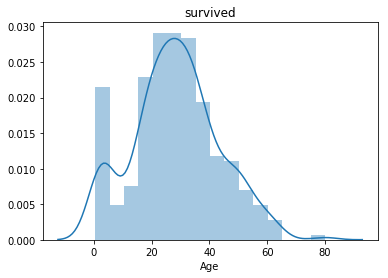

In [27]:
sns.distplot(surv)
plt.title("survived")
plt.xlabel('Age')
plt.show()

**overlapping histogram : **

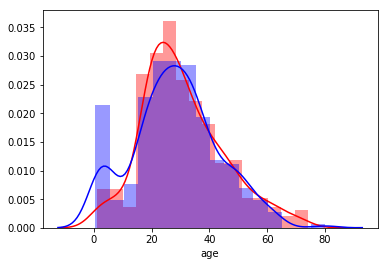

In [33]:
sns.distplot(not_surv, color='red')
sns.distplot(surv, color='blue')
plt.xlabel("age")
plt.show()

**histogram without KDE : **

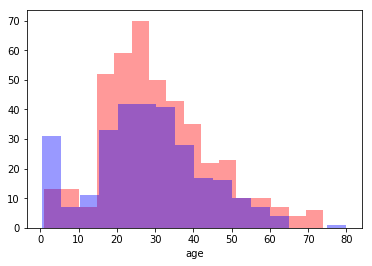

In [34]:
sns.distplot(not_surv, color='red', kde=False)
sns.distplot(surv, color='blue', kde=False)
plt.xlabel("age")
plt.show()

**sns.FacetGrid : **

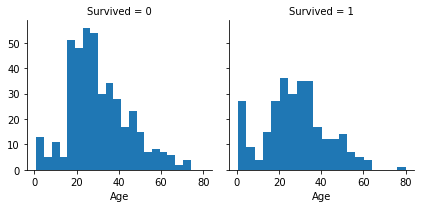

In [36]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

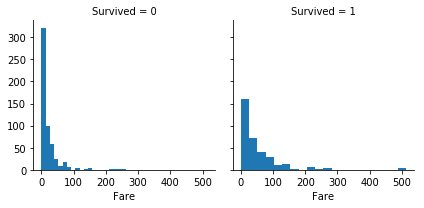

In [37]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)
plt.show()

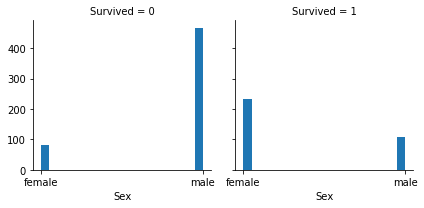

In [38]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Sex', bins=20)
plt.show()

**groupby()**

**this way is the most simple and clear : **
- first we take columns from our df (we take them as df as well by df[[col1, col2]]
- then we group by one column which is the key in our grouping : groupby (column_name)
- then we apply some method : mean()

In [40]:
train_df[['Sex', 'Age']].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [41]:
train_df[['Sex', 'Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [42]:
train_df[["Pclass", 'Survived']].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363
